###########################
##- Genral data - README -#
###########################

This program takes the RG theorical values calculated with the 'RG_quantification_report' script and the list of Rg calculated with crysol for each PED id and returns the plots with the limits lines

In [3]:
############################
##- Installing libraries -##
#--------- Python 3 -------#
############################
try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain

def install(package):
    pipmain(['install', "--upgrade", "pip"])
    if hasattr(pip, 'main'):
        pip.main(['install', package])
    else:
        try:
            pip._internal.main(['install', package])
        except:
            print(pip._internal.main(['install', package]))

In [4]:
######################################
####- Checking if seaborn exists -####
try:
    import seaborn
except:
    ##########################
    ##- Installing seaborn -##
    ##########################
    install('seaborn')

In [71]:
###############################
####- Importing libraries -####
import pandas as pd
import seaborn as sns
import os,glob
import matplotlib.pyplot as plt

In [72]:
##################
#- seting paths -#
path_main = '/home/anajulia/Be_project/Data'
path_data = path_main + '/PED-DB3'
path_reports = path_data + '/reports'

In [73]:
##############################
##- rretrieving the paths -##
df_paths = pd.read_csv(path_main + '/general_paths_to_data', sep='\t')
PEDs = list(df_paths)

In [74]:
#############################
##- rretrieving the data -##
df_theorg = pd.read_csv(path_reports + '/theoRGs.cvs')

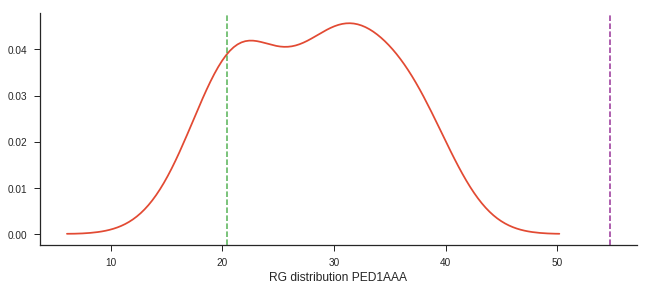

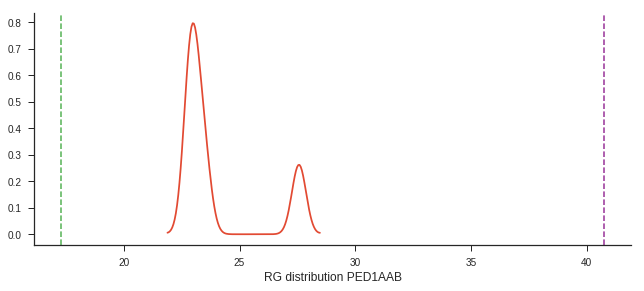

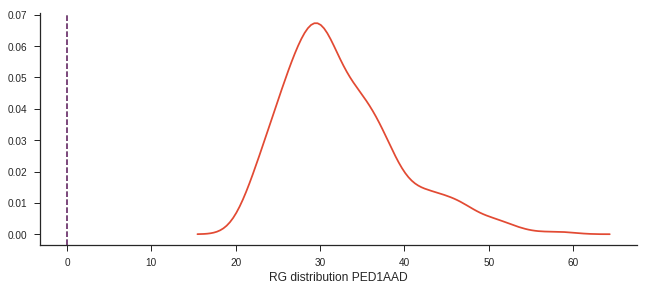

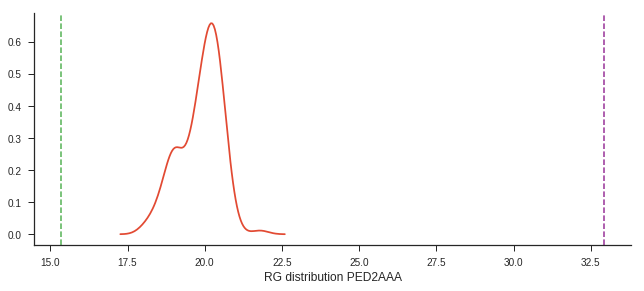

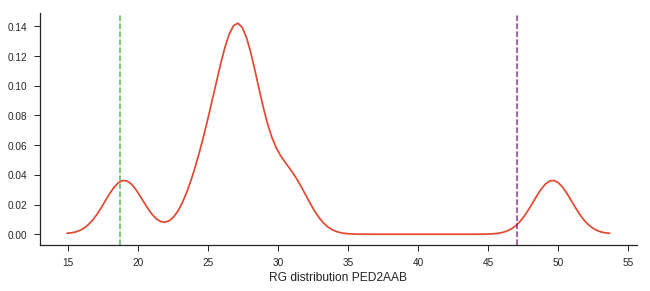

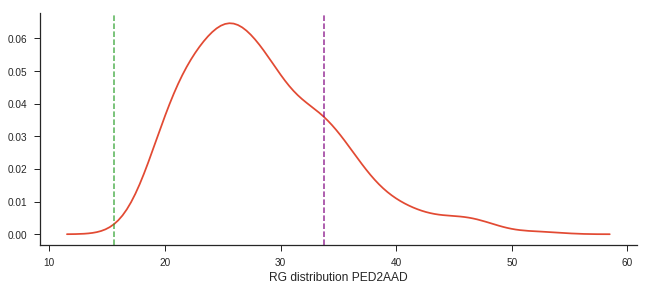

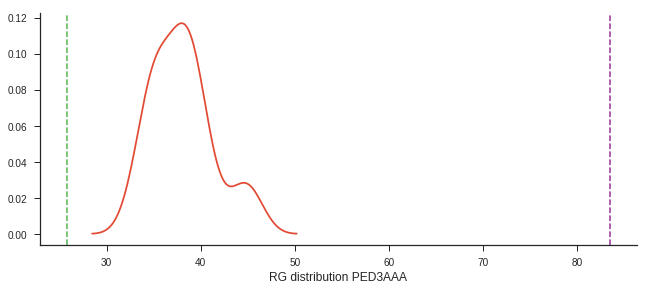

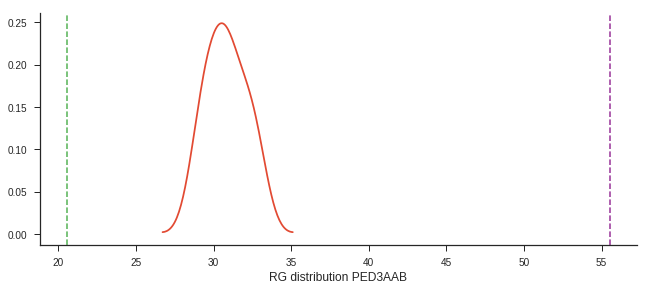

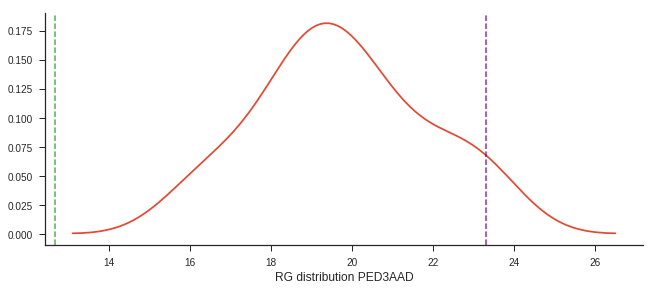

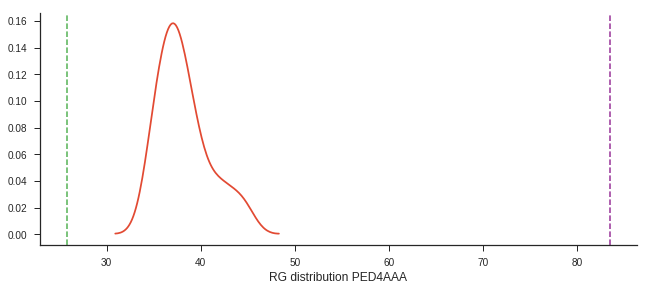

In [75]:
#########################
##- ploting the data -##
for i in PEDs:
    try:
        datapath = path_data + '/' + i + '/rg.list'
        df_data = pd.read_csv(datapath, sep='\t')
        RGIDP = df_theorg[df_theorg['PEDid']==i]['RgIDP'].iloc[0]
        RGNF = df_theorg[df_theorg['PEDid']==i]['RgNF'].iloc[0]
        ##Plot
        sns.set_style('ticks')
        fig, ax = plt.subplots()
        fig.set_size_inches(10.7, 4.27)
        sns.distplot(df_data['Rg'], rug=False, hist=False)
        plt.axvline(x=RGNF, ls = "--", color='#2ca02c', alpha=0.7)
        plt.axvline(x=RGIDP, ls = "--", color='purple', alpha=0.7)
        plt.xlabel('RG distribution ' + i)
        sns.despine()
        savefig(path_reports + '/' + i +"rg_plot.jpg")
    except:
        pass